IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

DATA OPERATIONS

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/clean_dataset.csv')

# Display the first 10 rows of the DataFrame
df.head(n=10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [ ]:
# Print the data types of each column in the DataFrame
df.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

In [ ]:
#Used to get a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [ ]:
#Generate descriptive statistics.
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


DATA VISUALIZATION

0    383
1    307
Name: Approved, dtype: int64


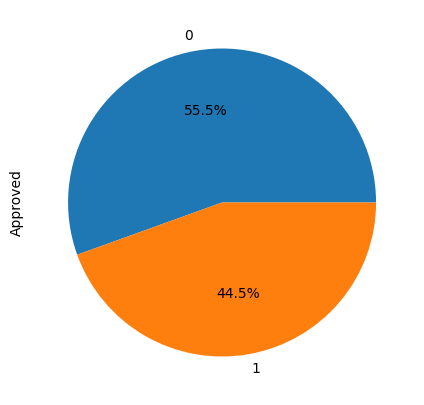

In [ ]:
# Print the value counts of the 'Approved' column
print(df['Approved'].value_counts())

# Plot a pie chart of the 'Approved' column
df['Approved'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

1    480
0    210
Name: Gender, dtype: int64


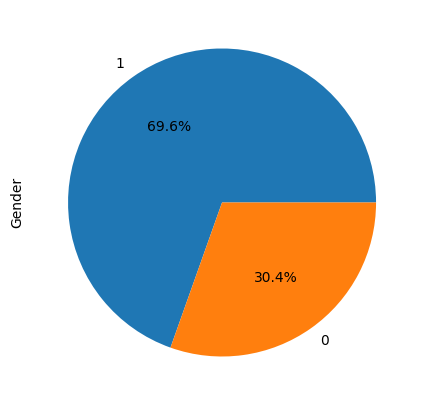

In [ ]:
# Print the value counts of the 'Gender' column
print(df['Gender'].value_counts())

# Plot a pie chart of the 'Gender' column
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

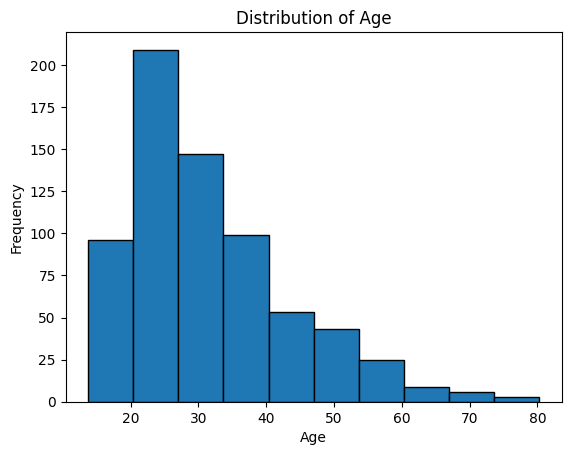

In [ ]:
plt.hist(df['Age'], bins=10, edgecolor='black')

# Adding labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Displaying the plot
plt.show()

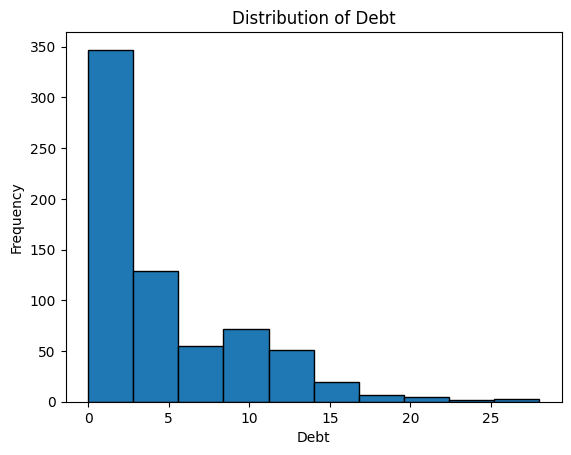

In [ ]:
plt.hist(df['Debt'], bins=10, edgecolor='black')

# Adding labels and title to the plot
plt.xlabel('Debt')
plt.ylabel('Frequency')
plt.title('Distribution of Debt')

# Displaying the plot
plt.show()

1    525
0    165
Name: Married, dtype: int64


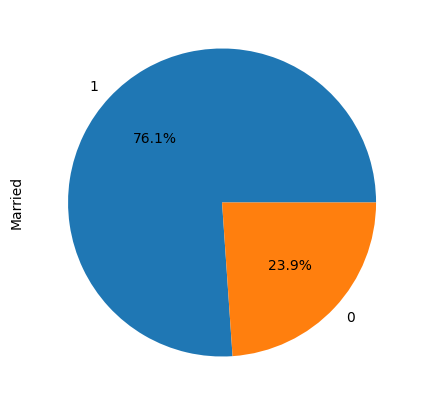

In [ ]:
# Print the value counts of the 'Married' column
print(df['Married'].value_counts())

# Plot a pie chart of the 'Married' column
df['Married'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

1    527
0    163
Name: BankCustomer, dtype: int64


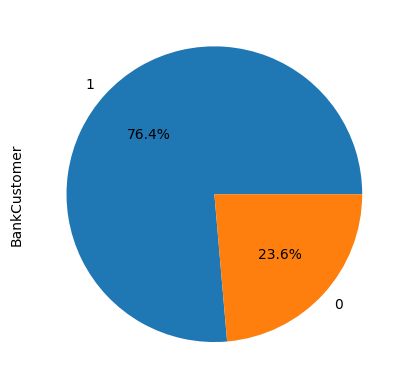

In [ ]:
# Print the value counts of the 'BankCustomer' column
print(df['BankCustomer'].value_counts())

# Plot a pie chart of the 'BankCustomer' column
df['BankCustomer'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

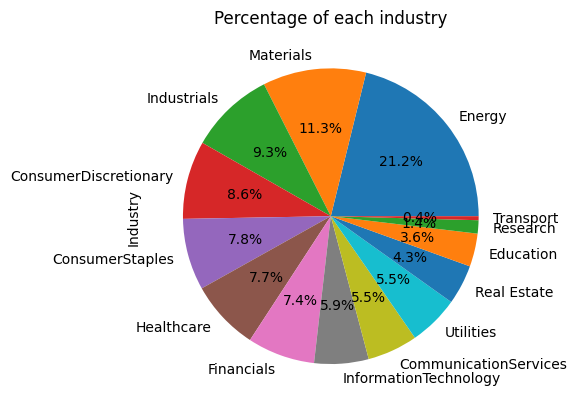

In [ ]:
# Count the frequency of each industry
industry_counts = df['Industry'].value_counts()

# Plot the pie chart
industry_counts.plot.pie(autopct='%1.1f%%')
plt.title('Percentage of each industry')
plt.show()

White     408
Black     138
Asian      59
Latino     57
Other      28
Name: Ethnicity, dtype: int64


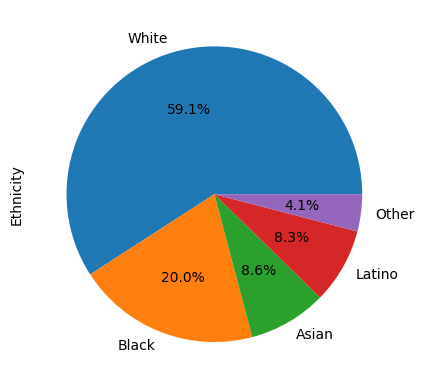

In [ ]:
# Print the value counts of the ''Ethnicity'' column
print(df['Ethnicity'].value_counts())

# Plot a pie chart of the ''Ethnicity'' column
df['Ethnicity'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

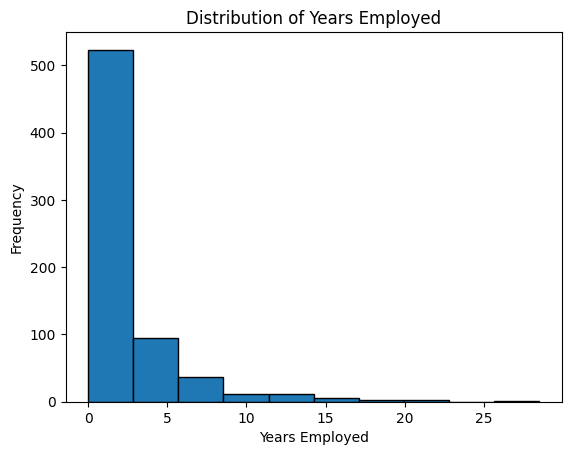

In [ ]:
plt.hist(df['YearsEmployed'], bins=10, edgecolor='black')

# Adding labels and title to the plot
plt.xlabel('Years Employed')
plt.ylabel('Frequency')
plt.title('Distribution of Years Employed')

# Displaying the plot
plt.show()

1    361
0    329
Name: PriorDefault, dtype: int64


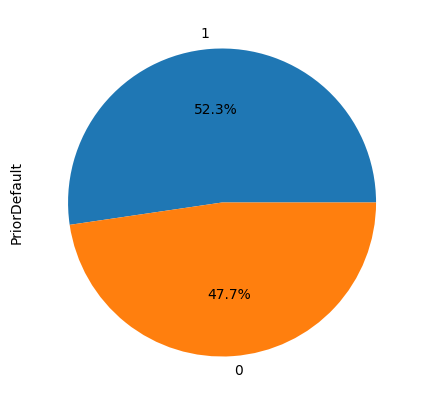

In [ ]:
# Print the value counts of the 'Prior Default' column
print(df['PriorDefault'].value_counts())

# Plot a pie chart of the 'Prior Default' column
df['PriorDefault'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

0    395
1    295
Name: Employed, dtype: int64


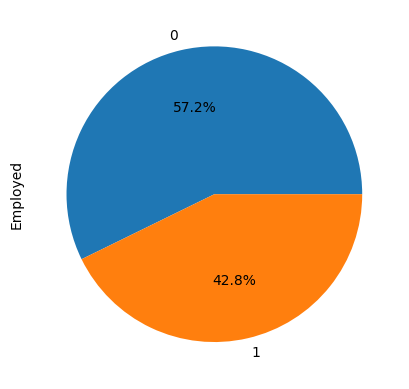

In [ ]:
# Print the value counts of the 'Employed' column
print(df['Employed'].value_counts())

# Plot a pie chart of the 'Employed' column
df['Employed'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

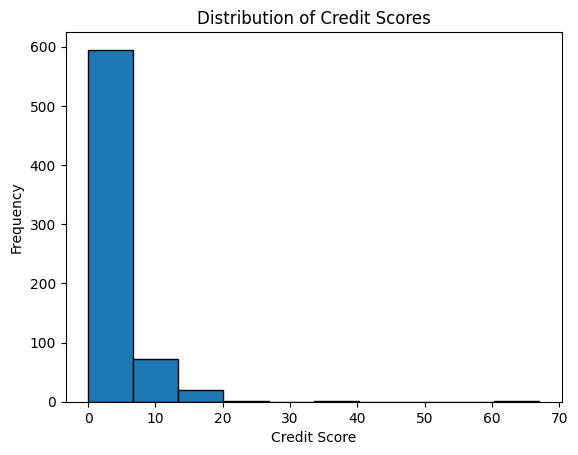

In [ ]:
plt.hist(df['CreditScore'], bins=10, edgecolor='black')

# Adding labels and title to the plot
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores')

# Displaying the plot
plt.show()

0    374
1    316
Name: DriversLicense, dtype: int64


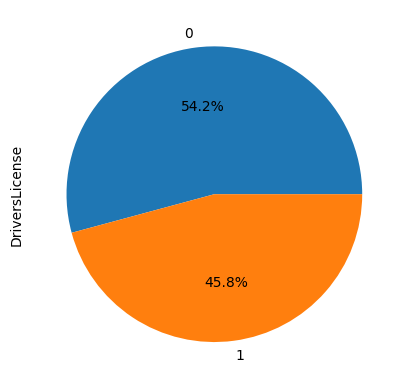

In [ ]:
# Print the value counts of the 'DriversLicense' column
print(df['DriversLicense'].value_counts())

# Plot a pie chart of the 'DriversLicense' column
df['DriversLicense'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64


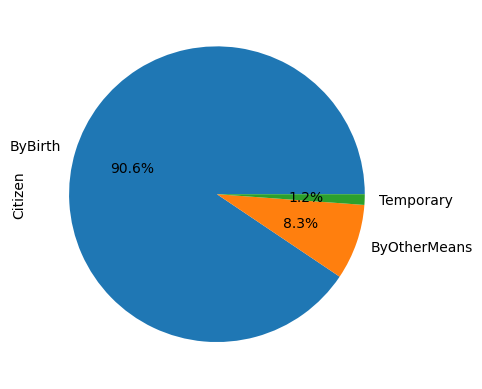

In [ ]:
# Print the value counts of the 'DriversLicense' column
print(df['Citizen'].value_counts())

# Plot a pie chart of the 'DriversLicense' column
df['Citizen'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

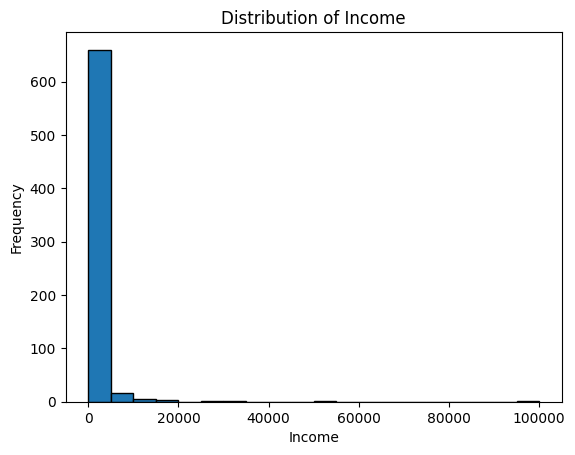

In [ ]:
plt.hist(df['Income'], bins=20, edgecolor='black')

# Adding labels and title to the plot
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')

# Displaying the plot
plt.show()

DATA PRE PROCESSING AND SPLITING

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over each column in the DataFrame
for col in df.columns:
    # Check if the column data type is 'object' (categorical)
    if df[col].dtypes == object:
        # Encode the categorical column using the LabelEncoder
        df[col] = le.fit_transform(df[col])

In [ ]:
# Split the data into input features (x) and target variable (y)
x = df.drop('Approved', axis=1)
y = df['Approved']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
# Create a StandardScaler object
sc = StandardScaler()

# Scale the training data
x_train = sc.fit_transform(x_train)

# Scale the test data
x_test = sc.transform(x_test)

LOGISTIC REGRESSION: BEFORE OPTIMIZATION

In [ ]:
# Create a Logistic Regression classifier object
classifier_lr = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
classifier_lr.fit(x_train, y_train)

# Make predictions on the test data using the trained classifier
y_pred_lr = classifier_lr.predict(x_test)

# Calculate and print the accuracy of the classifier
print('Accuracy:', accuracy_score(y_test, y_pred_lr))

# Generate and print the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Generate and print the classification report, including precision, recall, and F1-score
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8497109826589595
[[76 15]
 [11 71]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        91
           1       0.83      0.87      0.85        82

    accuracy                           0.85       173
   macro avg       0.85      0.85      0.85       173
weighted avg       0.85      0.85      0.85       173



NAIVE BAYES: BEFORE OPTIMIZATION

In [ ]:
# Create a Gaussian Naive Bayes classifier object
classifier_nb = GaussianNB()

# Train the Gaussian Naive Bayes classifier on the training data
classifier_nb.fit(x_train, y_train)

# Make predictions on the test data using the trained classifier
ypred_nb = classifier_nb.predict(x_test)

# Calculate and print the accuracy of the classifier
print('Accuracy:', accuracy_score(y_test, ypred_nb))

# Generate and print the classification report, including precision, recall, and F1-score
print(classification_report(y_test, ypred_nb))

# Generate and print the confusion matrix
cm_nb = confusion_matrix(y_test, ypred_nb)
print(cm_nb)

Accuracy: 0.7861271676300579
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        91
           1       0.86      0.66      0.74        82

    accuracy                           0.79       173
   macro avg       0.80      0.78      0.78       173
weighted avg       0.80      0.79      0.78       173

[[82  9]
 [28 54]]


DECISION TREE: BEFORE OPTIMIZATION

In [ ]:
# Create a Decision Tree classifier object
classifier_dt = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
classifier_dt = classifier_dt.fit(x_train, y_train)

# Make predictions on the test data using the trained classifier
ypred_dt = classifier_dt.predict(x_test)

# Calculate and print the accuracy of the classifier
print('Accuracy:', accuracy_score(y_test, ypred_dt))

# Generate and print the classification report, including precision, recall, and F1-score
print(classification_report(y_test, ypred_dt))

# Generate and print the confusion matrix
cm_dt = confusion_matrix(y_test, ypred_dt)
print(cm_dt)

Accuracy: 0.8323699421965318
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        91
           1       0.85      0.78      0.82        82

    accuracy                           0.83       173
   macro avg       0.83      0.83      0.83       173
weighted avg       0.83      0.83      0.83       173

[[80 11]
 [18 64]]


DECISION TREE: AFTER OPTIMIZATION

In [ ]:
# Create a Decision Tree classifier with entropy as the criterion and maximum depth of 4
classifier_dt1 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train the Decision Tree classifier on the training data
classifier_dt1 = classifier_dt1.fit(x_train, y_train)

# Make predictions on the test data using the trained classifier
ypred_dt1 = classifier_dt1.predict(x_test)

# Calculate and print the accuracy of the classifier
print('Accuracy:', accuracy_score(y_test, ypred_dt1))

# Generate and print the classification report, including precision, recall, and F1-score
print(classification_report(y_test, ypred_dt1))

# Generate and print the confusion matrix
cm_dt1 = confusion_matrix(y_test, ypred_dt1)
print(cm_dt1)

Accuracy: 0.8554913294797688
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        91
           1       0.91      0.77      0.83        82

    accuracy                           0.86       173
   macro avg       0.87      0.85      0.85       173
weighted avg       0.86      0.86      0.85       173

[[85  6]
 [19 63]]


Correlation

In [ ]:
# Calculate the absolute correlation values with the target variable 'Approved'
df_corr = df.corr()['Approved'].abs()

# Sort the correlation values in descending order
df_corr = df_corr.sort_values(ascending=False)

print(df_corr)

Approved          1.000000
PriorDefault      0.720407
Employed          0.458301
CreditScore       0.406410
YearsEmployed     0.322475
Debt              0.206294
Industry          0.202158
BankCustomer      0.188964
Married           0.180583
Income            0.175657
Age               0.164086
ZipCode           0.099598
Ethnicity         0.075558
Citizen           0.063556
DriversLicense    0.031625
Gender            0.028934
Name: Approved, dtype: float64


In [ ]:
# Select features based on correlation threshold
# Get the column names where the correlation value is greater than 0.1
features = df_corr[df_corr > 0.1].index.to_list()[1:]
print(features)
# The index [1:] is used to exclude the first feature, as it is the target variable

['PriorDefault', 'Employed', 'CreditScore', 'YearsEmployed', 'Debt', 'Industry', 'BankCustomer', 'Married', 'Income', 'Age']


In [ ]:
# Extract the features and target variables from the dataframe
x1 = df[['PriorDefault', 'Employed', 'CreditScore', 'YearsEmployed', 'Debt',
         'Industry', 'BankCustomer', 'Married', 'Income', 'Age']]
y1 = df['Approved']

# Split the data into training and test sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=65)

# Scale the features using StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

LOGISTIC REGRESSION: AFTER OPTIMIZATION

In [ ]:
# Create a Logistic Regression classifier with a random state of 65
classifier_lr1 = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
classifier_lr1.fit(x1_train, y1_train)

# Make predictions on the test data using the trained classifier
y1_pred_lr1 = classifier_lr1.predict(x1_test)

# Calculate and print the accuracy of the classifier
print('Accuracy:', metrics.accuracy_score(y1_test, y1_pred_lr1))

# Generate and print the confusion matrix
cm_lr1 = confusion_matrix(y1_test, y1_pred_lr1)
print(cm_lr1)

# Generate and print the classification report, including precision, recall, and F1-score
print(classification_report(y1_test, y1_pred_lr1))

Accuracy: 0.884393063583815
[[79  6]
 [14 74]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        85
           1       0.93      0.84      0.88        88

    accuracy                           0.88       173
   macro avg       0.89      0.89      0.88       173
weighted avg       0.89      0.88      0.88       173



NAIVE BAYES: AFTER OPTIMIZATION

In [ ]:
# Create a Gaussian Naive Bayes classifier
classifier_nb1 = GaussianNB()

# Train the Gaussian Naive Bayes classifier on the training data
classifier_nb1.fit(x1_train, y1_train)

# Make predictions on the test data using the trained classifier
ypred_nb1 = classifier_nb1.predict(x1_test)

# Calculate and print the accuracy of the classifier
print('Accuracy:', accuracy_score(y1_test, ypred_nb1))

# Generate and print the classification report, including precision, recall, and F1-score
print(classification_report(y1_test, ypred_nb1))

# Generate and print the confusion matrix
cm_nb1 = confusion_matrix(y1_test, ypred_nb1)
print(cm_nb1)

Accuracy: 0.7745664739884393
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        85
           1       0.89      0.64      0.74        88

    accuracy                           0.77       173
   macro avg       0.80      0.78      0.77       173
weighted avg       0.80      0.77      0.77       173

[[78  7]
 [32 56]]


DECISION TREE: AFTER OPTIMIZATION

In [ ]:
# Create a decision tree classifier with entropy as the criterion and max depth of 5
classifier_dt2 = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train the decision tree classifier on the training data
classifier_dt2 = classifier_dt2.fit(x1_train, y1_train)

# Make predictions on the test data using the trained classifier
y_pred_dt2 = classifier_dt2.predict(x1_test)

# Calculate and print the accuracy of the classifier
print('Accuracy:', accuracy_score(y1_test, y_pred_dt2))

# Generate and print the classification report, including precision, recall, and F1-score
print(classification_report(y1_test, y_pred_dt2))

# Generate and print the confusion matrix
cm_dt2 = confusion_matrix(y1_test, y_pred_dt2)
print(cm_dt2)

Accuracy: 0.884393063583815
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        85
           1       0.90      0.88      0.89        88

    accuracy                           0.88       173
   macro avg       0.88      0.88      0.88       173
weighted avg       0.88      0.88      0.88       173

[[76  9]
 [11 77]]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


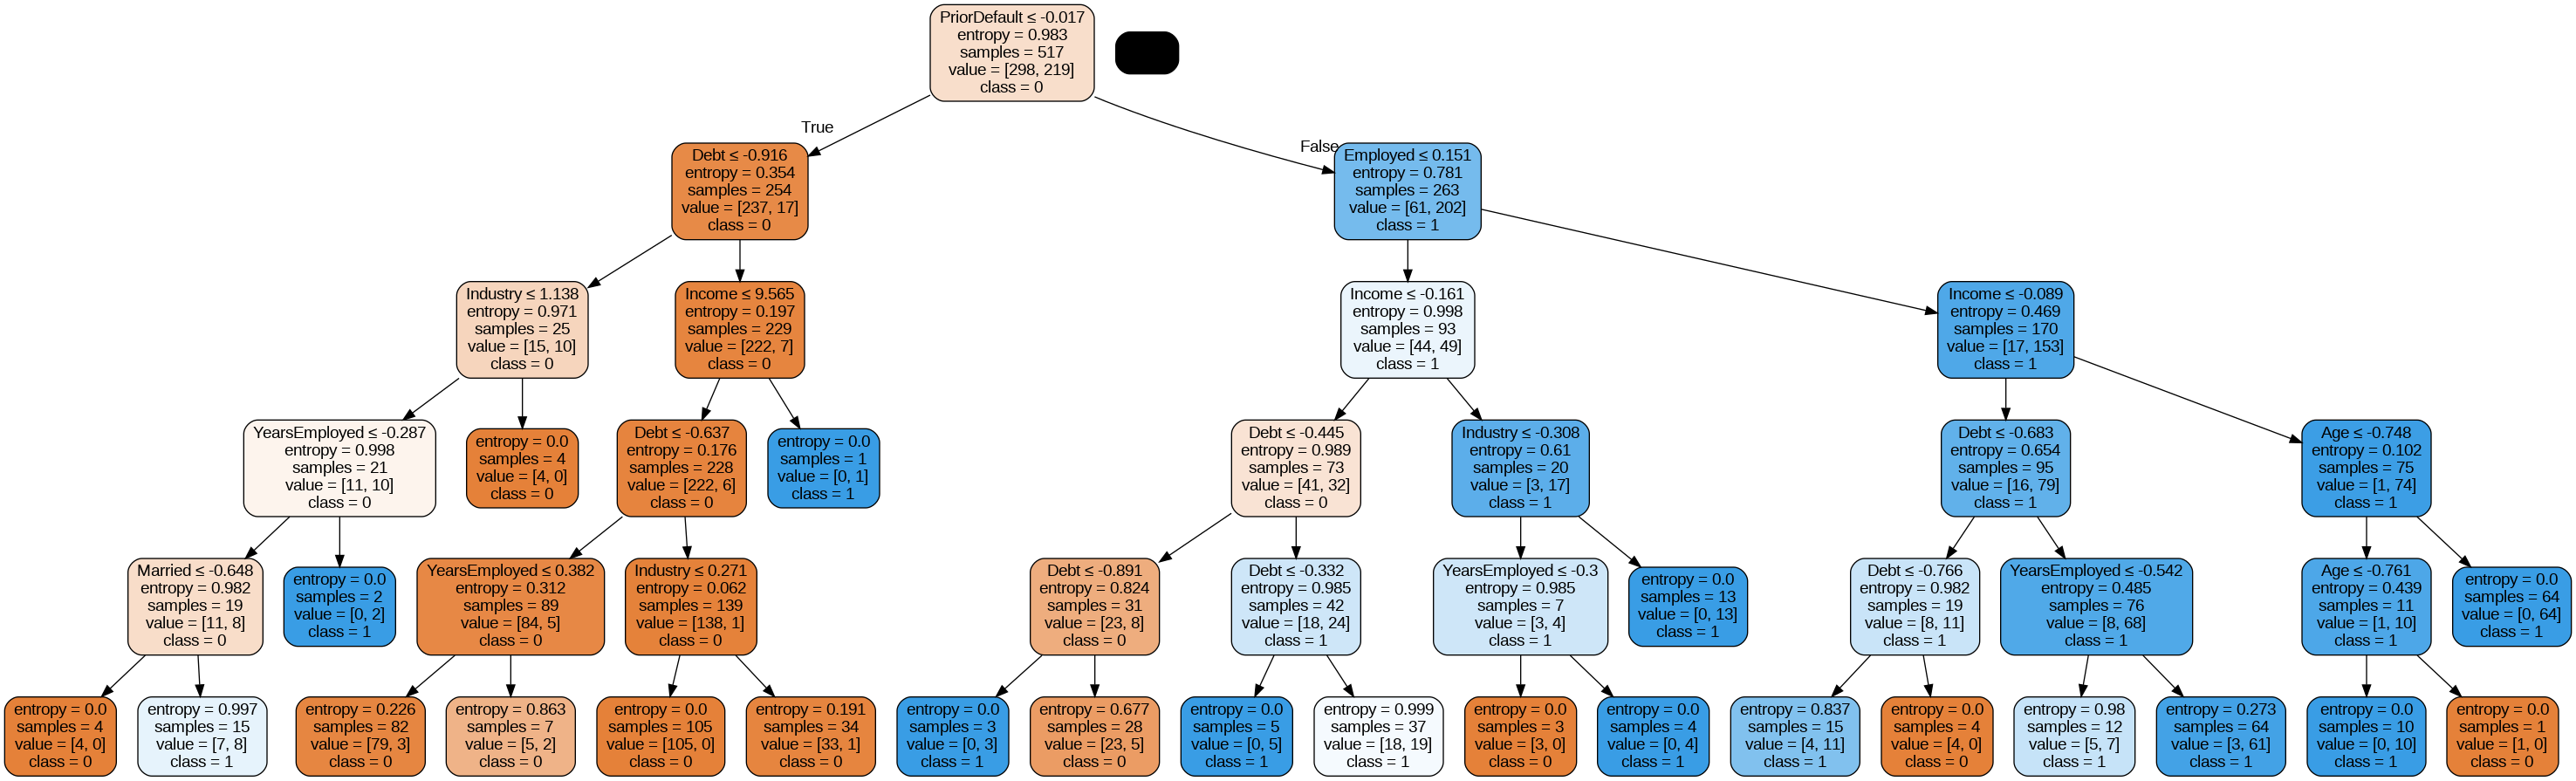

In [ ]:
# Import the required libraries
from sklearn.tree import export_graphviz
!pip install six
from six import StringIO
from IPython.display import Image
import pydotplus

# Define the feature columns
feature_cols = ['PriorDefault', 'Employed', 'CreditScore', 'YearsEmployed',
                'Debt', 'Industry', 'BankCustomer', 'Married', 'Income', 'Age']

# Create a StringIO object to store the dot data
data = StringIO()

# Generate the dot data for the decision tree visualization
export_graphviz(classifier_dt2, out_file=data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])

# Create the graph from the dot data
graph = pydotplus.graph_from_dot_data(data.getvalue())

# Display the decision tree image
Image(graph.create_png())

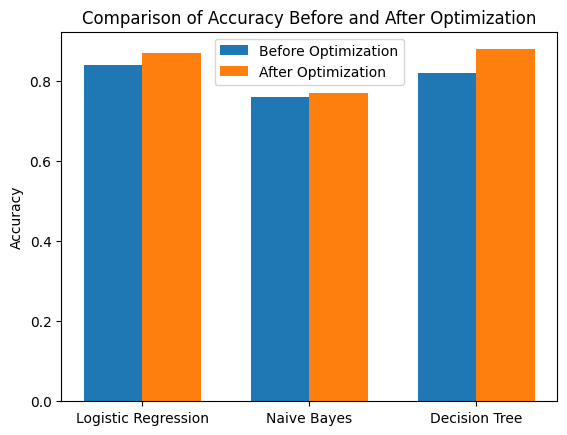

In [ ]:

# Define the algorithm names
algorithm_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree']

# Define the accuracy values before and after optimization
accuracy_before_opt = [0.84, 0.76, 0.82]
accuracy_after_opt = [0.87, 0.77, 0.88]

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = range(len(algorithm_names))

# Plot the bars for accuracy before optimization
ax.bar(bar_positions, accuracy_before_opt, width=bar_width, label='Before Optimization')

# Plot the bars for accuracy after optimization
ax.bar([p + bar_width for p in bar_positions], accuracy_after_opt, width=bar_width, label='After Optimization')

# Set the x-axis labels and tick positions
ax.set_xticks([p + bar_width/2 for p in bar_positions])
ax.set_xticklabels(algorithm_names)

# Set the y-axis label
ax.set_ylabel('Accuracy')

# Set the plot title
ax.set_title('Comparison of Accuracy Before and After Optimization')

# Add a legend
ax.legend()

# Display the plot
plt.show()